In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

# custom imports
import wrangle
import prepare
import explore

# Exercises

- Our Zillow scenario continues:

<div class="alert alert-success" role="alert">

### As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.
</div>

- In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

## 1. As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

In [2]:
df = wrangle.wrangle_zillow()
df.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips
0,4,2.0,3633,296425,2005,6941.39,6037
1,3,4.0,1620,847770,2011,10244.94,6037
2,3,2.0,2077,646760,1926,7924.68,6037
3,0,0.0,1200,5328,1972,91.60,6037
4,0,0.0,171,6920,1973,255.17,6037


In [3]:
train, val, test = prepare.train_val_test(df)
train.shape, val.shape, test.shape

((1498164, 7), (321035, 7), (321036, 7))

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1498164 entries, 1001601 to 1692743
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    1498164 non-null  int64  
 1   bathrooms   1498164 non-null  float64
 2   area        1498164 non-null  int64  
 3   tax_value   1498164 non-null  int64  
 4   year_built  1498164 non-null  int64  
 5   tax_amount  1498164 non-null  float64
 6   fips        1498164 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 91.4 MB


## 2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [5]:
# for col in train.columns[train.dtypes != 'object']:

#     plt.figure()
#     sns.histplot(data = train, x = col)
#     plt.title(f'Distribution of {col}')
#     plt.show()

In [6]:
# for col in train.columns[train.dtypes == 'object']:

#     plt.figure()
#     sns.countplot(data = train, x = col)
#     plt.title(f'Count of {col}')
#     plt.show()

## 3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [7]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips
1001601,3,2.0,1452,241012,1980,2974.81,6037
611989,3,2.0,1262,235630,1953,3029.22,6037
658616,3,1.0,1447,435123,1947,5226.67,6037
835115,3,2.0,1403,268770,1965,2849.62,6111
242295,3,2.0,1456,365000,1961,4582.48,6037


In [8]:
train = train.sample(100)

In [9]:
def plot_variable_pairs(df):
  """
  This function plots all of the pairwise relationships along with the regression line for each pair.

  Args:
    df: The dataframe containing the data.

  Returns:
    None.
  """

  for i in range(len(df.columns)):
    for j in range(i + 1, len(df.columns)):
      plt.figure()
      plt.scatter(df[df.columns[i]], df[df.columns[j]])
      plt.bar(df[df.columns[i]], df[df.columns[j]].mean(), color='green')
      plt.title('Scatter plot of {} vs {}'.format(df.columns[i], df.columns[j]))
      plt.show()

## 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [10]:
def plot_categorical_and_continuous_vars(df, continuous_var, categorical_var):
    """
    This function outputs three different plots for visualizing a categorical variable and a continuous variable.

    Args:
        df (pd.DataFrame): The dataframe containing the data.
        continuous_var (str): The name of the column that holds the continuous feature.
        categorical_var (str): The name of the column that holds the categorical feature.

    Returns:
        None.
    """

    # Create subplots with 1 row and 3 columns
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    # Box plot of the continuous variable for each category of the categorical variable
    sns.boxplot(x=categorical_var, y=continuous_var, data=df, ax=axes[0])
    axes[0].set_title('Box plot of {} for each category of {}'.format(continuous_var, categorical_var))

    # Violin plot of the continuous variable for each category of the categorical variable
    sns.scatterplot(x=categorical_var, y=continuous_var, data=df, ax=axes[1])
    axes[1].set_title('Violin plot of {} for each category of {}'.format(continuous_var, categorical_var))

    # Histogram of the continuous variable for each category of the categorical variable
    for cat in df[categorical_var].unique():
        sns.histplot(df[df[categorical_var] == cat][continuous_var], ax=axes[2], label=cat, kde=True)
        axes[2].set_title('Histogram of {} for each category of {}'.format(continuous_var, categorical_var))
        axes[2].legend(title=categorical_var)

    plt.tight_layout()
    plt.show()

**3 Categorical values:**

bedrooms, bathrooms, fips


**4 Continuous Values:**

area, tax_value, year_built, tax_amount

## 5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

In [11]:
# reimported my libs per step 5
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

# custom imports *added explore.py containing my functions above?
import wrangle
import prepare
import explore

## 6. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

### Module with functions loaded ✔️

## 7. Come up with some initial hypotheses based on your goal of predicting property value.

* Does bedrooms have a relationship with tax_value?
* Does tax_value have a correlation with area?
* Does tax_amount have a correlation with year built?

## Question 1

* Does bedrooms have a relationship with tax_value?
  
bedrooms is categorical and tax_value is continous

In [12]:
train.bedrooms.value_counts()

3    44
4    29
2    16
5     9
6     1
0     1
Name: bedrooms, dtype: int64

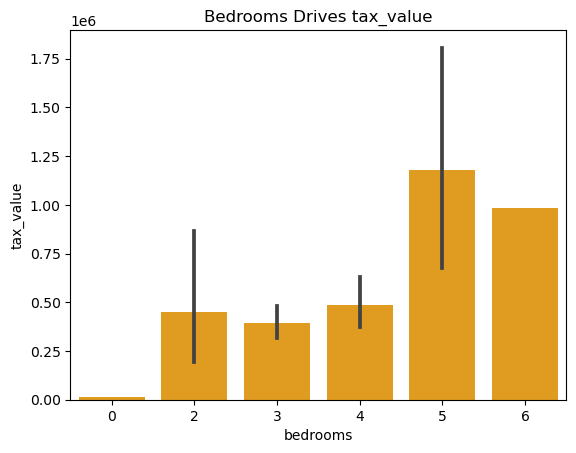

In [13]:
sns.barplot(data = train, x='bedrooms', y='tax_value', color='orange').set(title='Bedrooms Drives tax_value')
plt.show()

Yes, the number of bedrooms might have a relationship with tax_value. this may be good to use, but i need to look at other features that may have a bigger impact on tax_price.

## Question 2

* Does tax_value have a correlation with area?
  
tax_value and tax_amount is continous.

/opt/homebrew/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


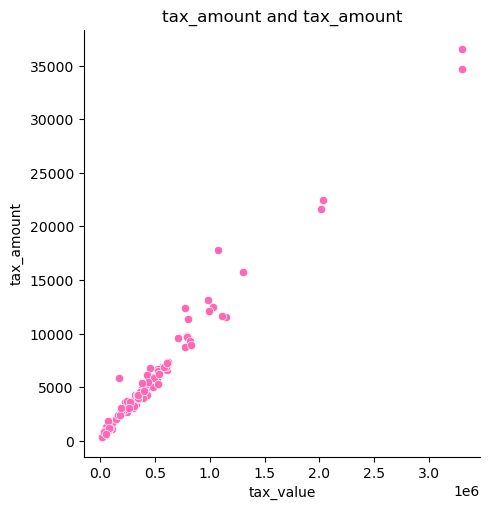

In [14]:
sns.relplot(data = train, x='tax_value', y='tax_amount', color='hotpink').set(title='tax_amount and tax_amount')
plt.show()

Yes there seems to be a correlation between tax_value and tax_amount and there is a linear one at that where the trend is positive.

**Null Hypothesis: There is no correlation between tax_value and tax_amount.**  
**Alternative Hypothesis: The is a correlation between tax_value and tax_amount.**

In [15]:
def pearsonr(x, y, a=0.05):
    
    r, p = stats.pearsonr(x, y)
    
    if p < a:
        
        print("Reject the null hypothesis\n")

        print(f"There is no significant linear correlation between {x.name} and {y.name}. {p}\n")
        
    else:
        
        print("Fail to reject the null hypothesis\n")
        
        print(f"There is a significant linear correlation between {x.name} and {y.name}. {p}\n")
    
    return r, p

# __________________________________________

def spearmanr(x, y, alpha=0.05):
    
    rho, p = stats.spearmanr(x, y)
    
    if p < alpha:
        
        print("Reject the null hypothesis\n")

        print(f"There is no significant monotonic correlation between {x.name} and {y.name}. {p}\n")
        
    else:
        
        print("Fail to reject the null hypothesis")

        print(f"There is a significant monotonic correlation between {x.name} and {y.name}. {p}\n")

    return rho, p

In [16]:
pearsonr(train.tax_value, train.tax_amount)

Reject the null hypothesis

There is no significant linear correlation between tax_value and tax_amount. 6.259063859517296e-80



(0.9871886875219338, 6.259063859517296e-80)

* There should be a correlation between tax_value sand tax_amount. The test resulted in rejecting the null hypothesis, and I think tax_value may not help model predict single family resindential property price.

## Question 3

* Does tax_amount have a correlation with year built?

tax_amount is continous and year_built is continuous

/opt/homebrew/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


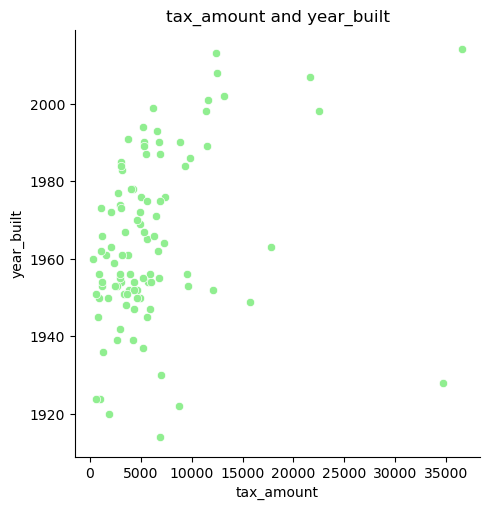

In [17]:
sns.relplot(data = train, x='tax_amount', y='year_built', color='lightgreen').set(title='tax_amount and year_built')
plt.show()

There is a uniform type of distribution in this visual. There seem's to not really be a correlation between tax_amount and year_built.

## 8. Visualize all combinations of variables in some way.

/opt/homebrew/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


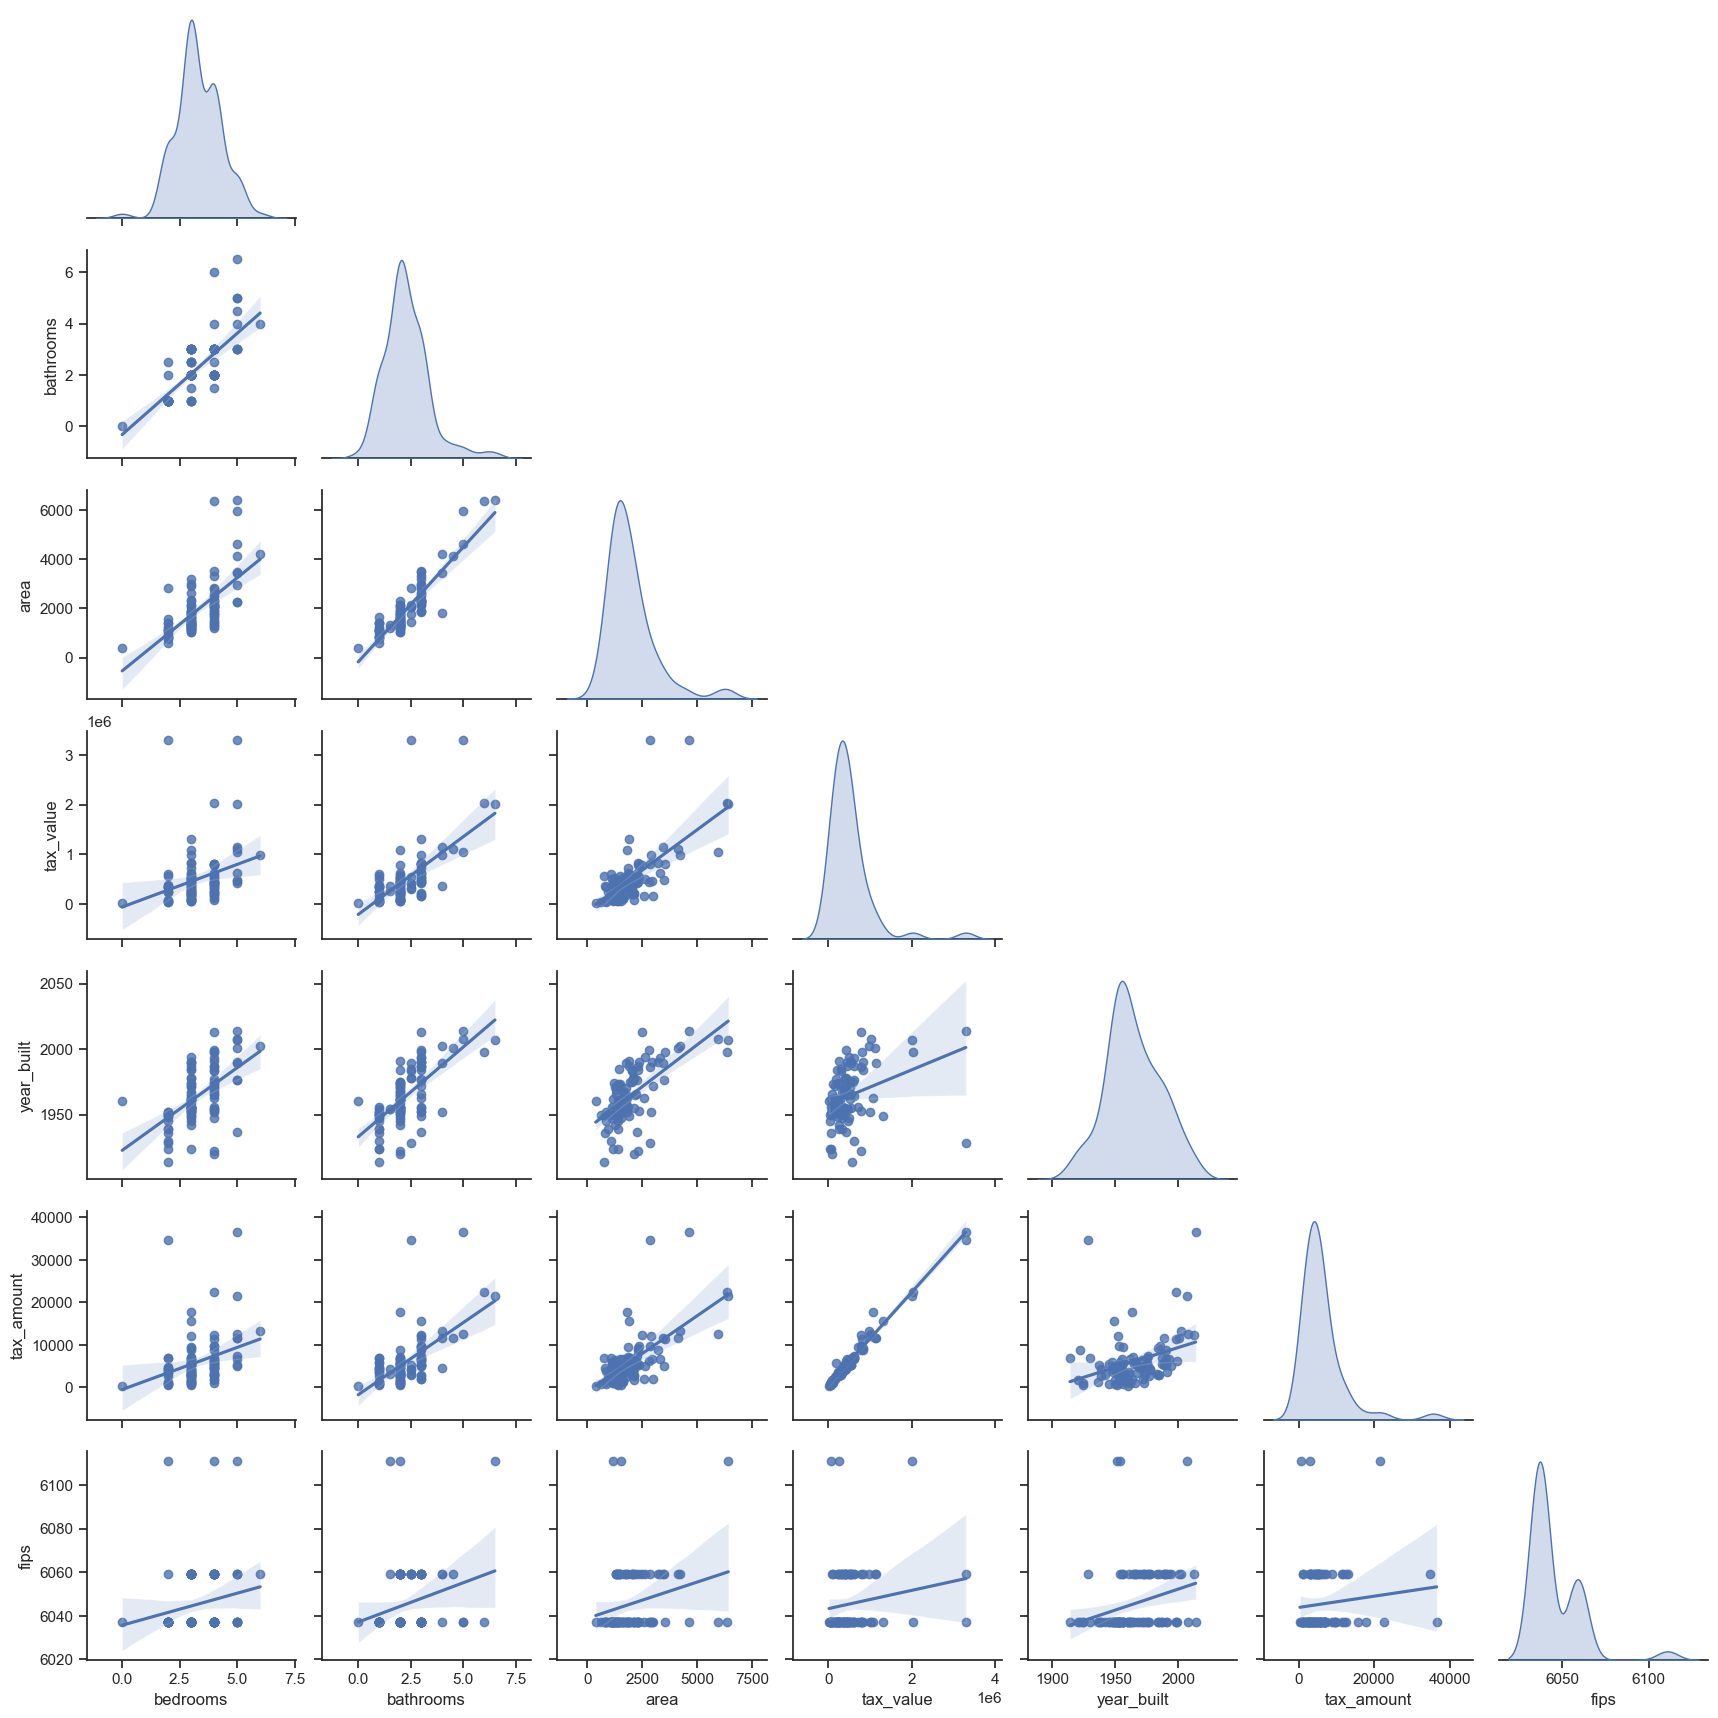

In [18]:
explore.plot_variable_pairs(train)

    **3 Categorical values:**

bedrooms, bathrooms, fips


    **4 Continuous Values:**

area, tax_value, year_built, tax_amount

In [19]:
train = train.sample(100)

##  FIPS
__________________________________

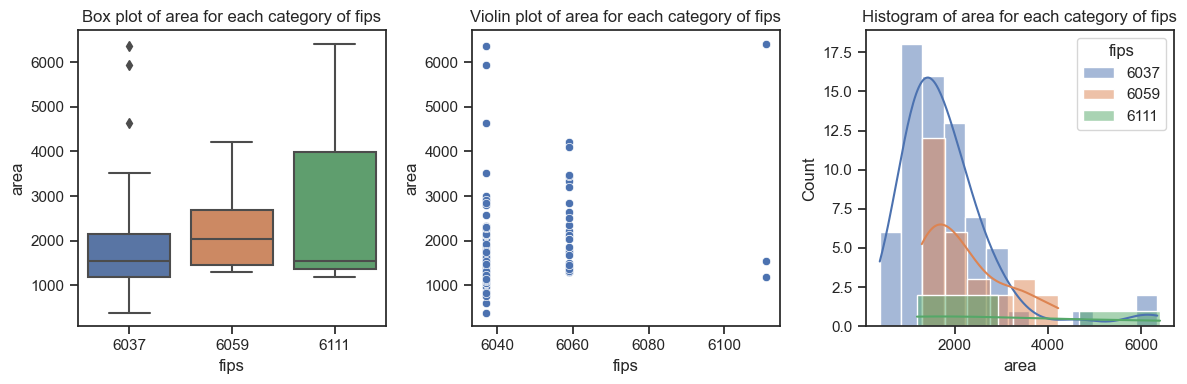

In [20]:
plot_categorical_and_continuous_vars(train, 'area', 'fips')

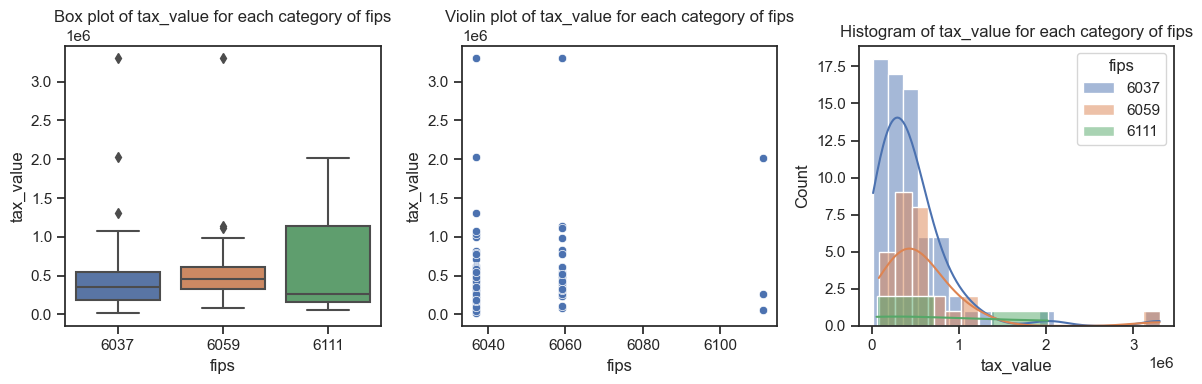

In [21]:
plot_categorical_and_continuous_vars(train, 'tax_value', 'fips')

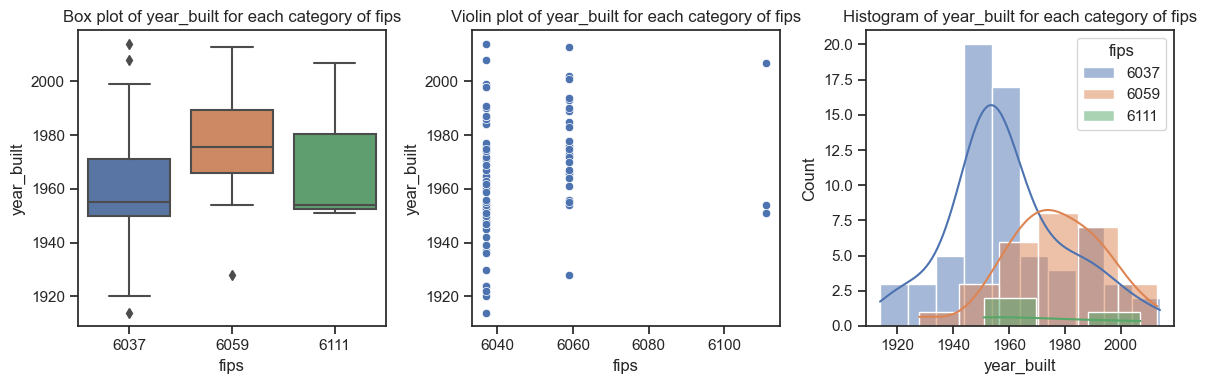

In [22]:
plot_categorical_and_continuous_vars(train, 'year_built', 'fips')

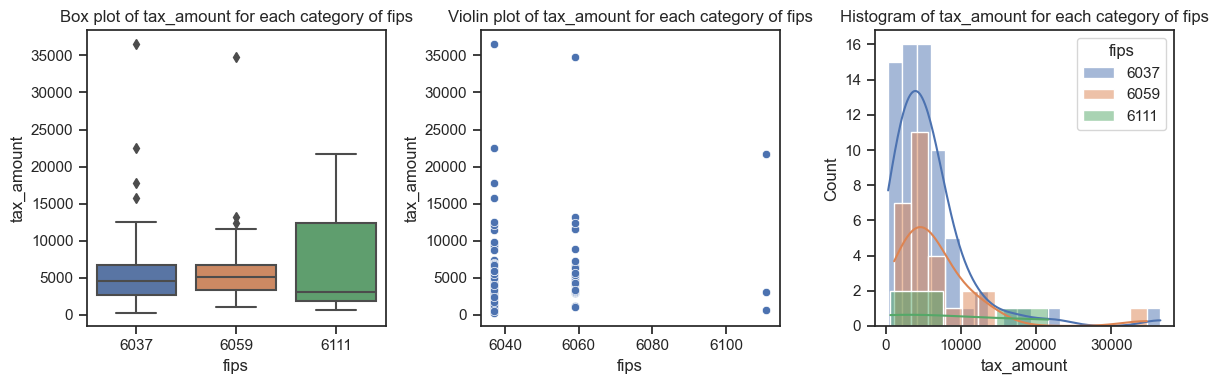

In [23]:
plot_categorical_and_continuous_vars(train, 'tax_amount', 'fips')

## BATHROOMS
_______________________________

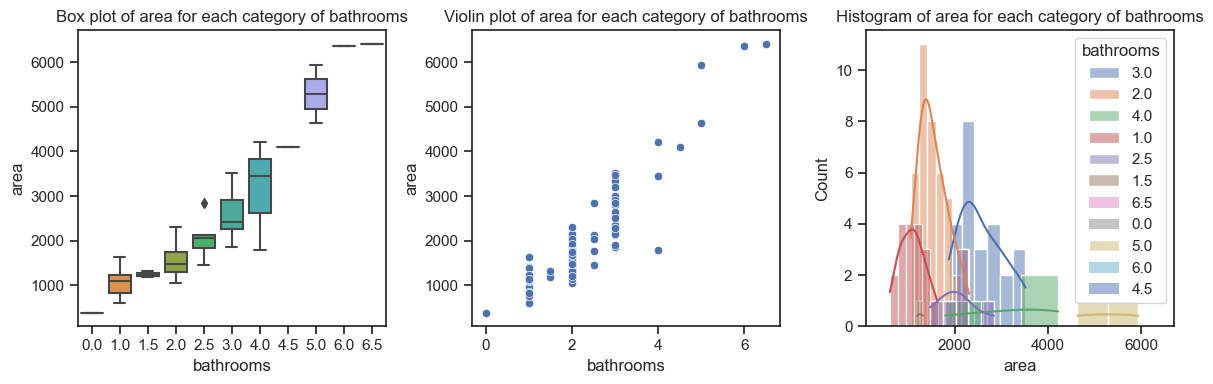

In [24]:
plot_categorical_and_continuous_vars(train, 'area', 'bathrooms')

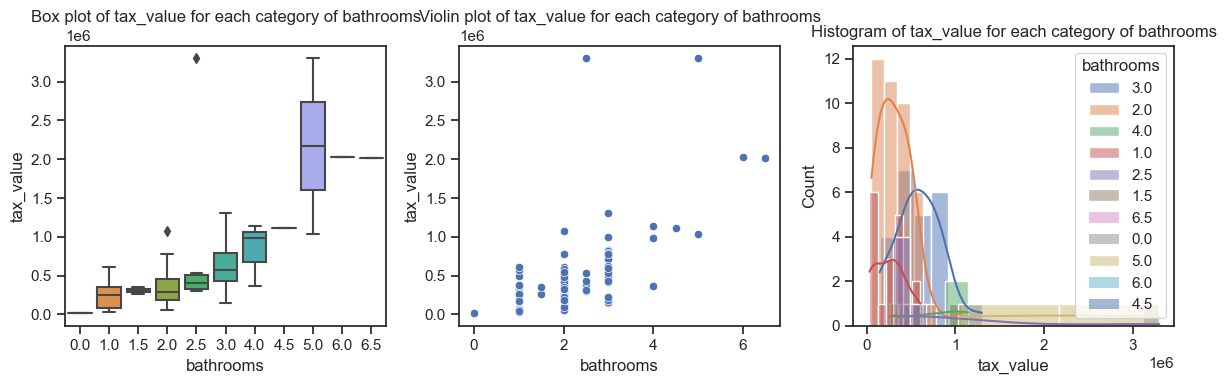

In [25]:
plot_categorical_and_continuous_vars(train, 'tax_value', 'bathrooms')

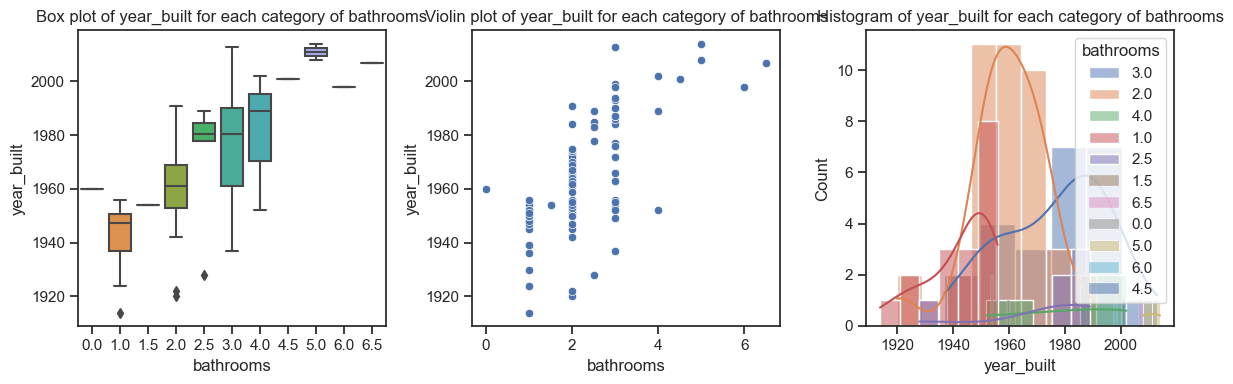

In [26]:
plot_categorical_and_continuous_vars(train, 'year_built', 'bathrooms')

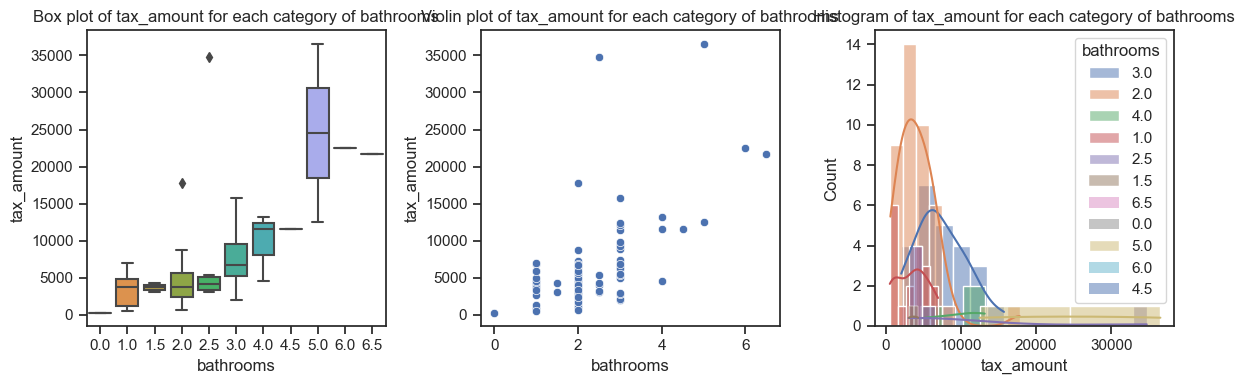

In [27]:
plot_categorical_and_continuous_vars(train, 'tax_amount', 'bathrooms')

## BEDROOMS
________________________________

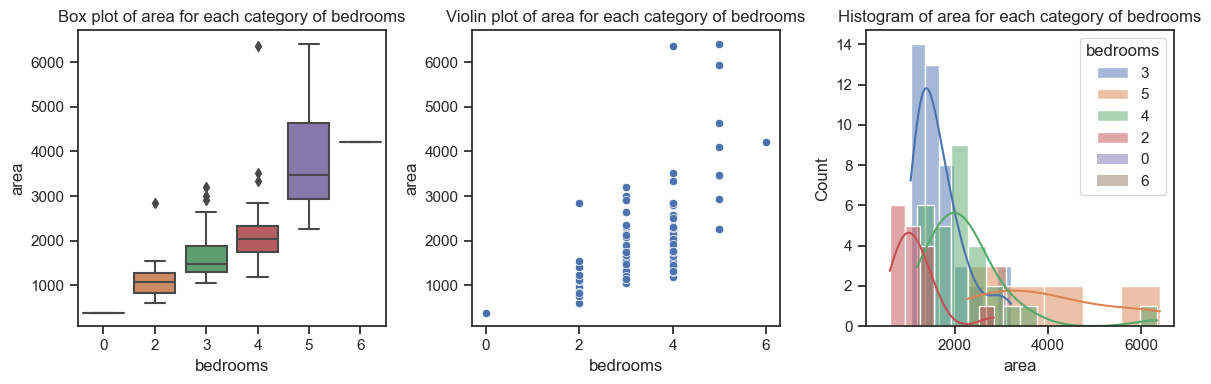

In [28]:
plot_categorical_and_continuous_vars(train, 'area', 'bedrooms')

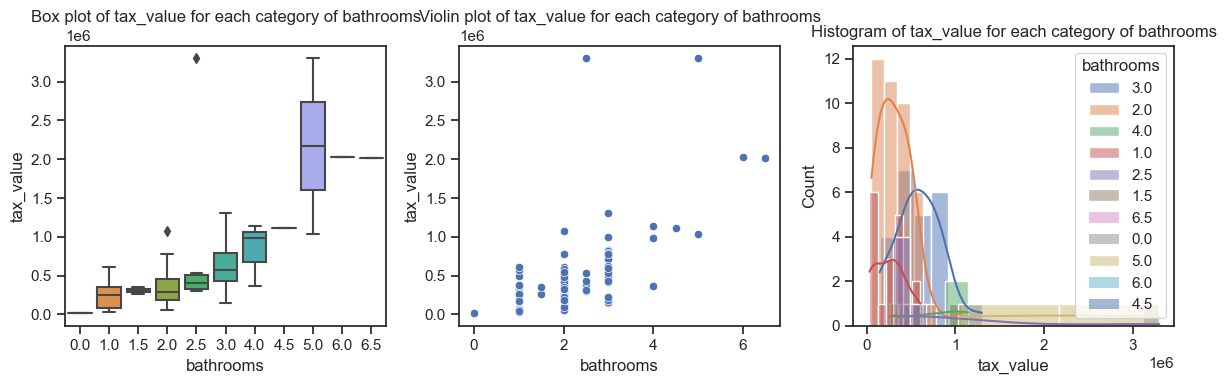

In [29]:
plot_categorical_and_continuous_vars(train, 'tax_value', 'bathrooms')

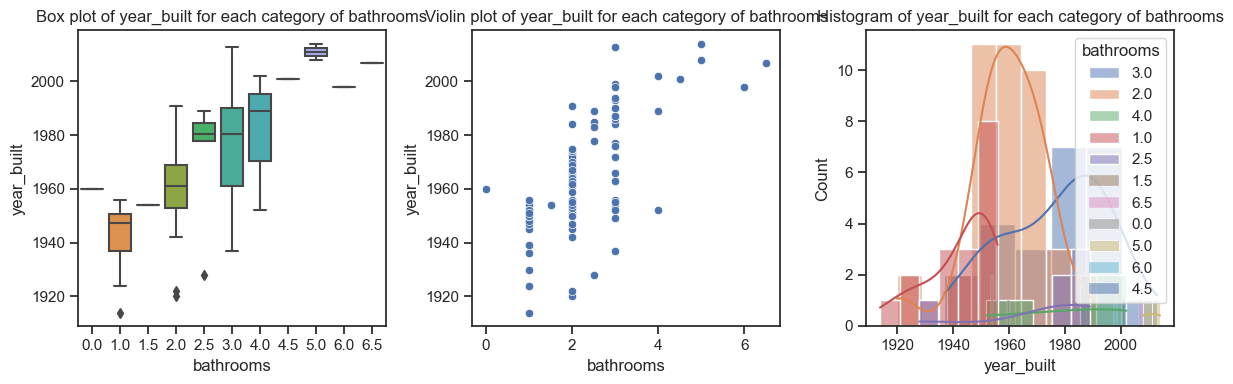

In [30]:
plot_categorical_and_continuous_vars(train, 'year_built', 'bathrooms')

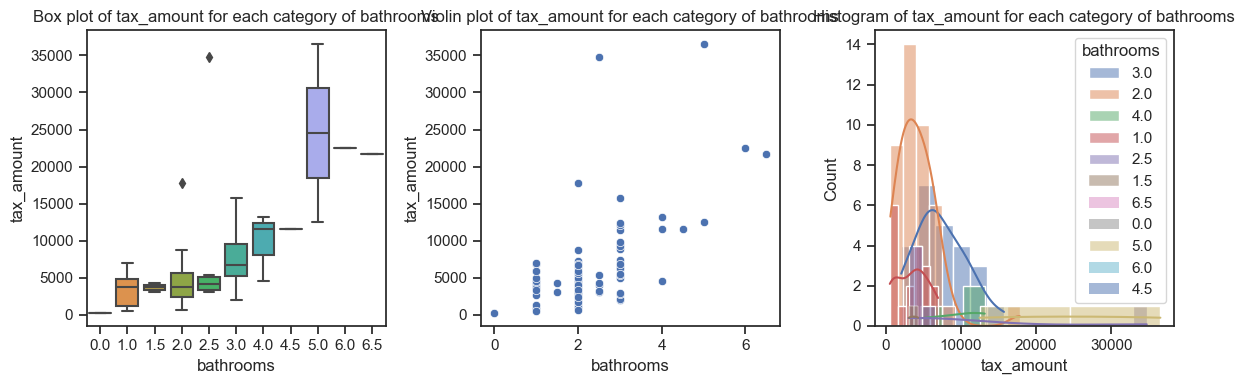

In [31]:
plot_categorical_and_continuous_vars(train, 'tax_amount', 'bathrooms')

## 9. Run the appropriate statistical tests where needed.

## Question 5

* Does tax_amount have a correlation with area?

tax_amount and area is continous

/opt/homebrew/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


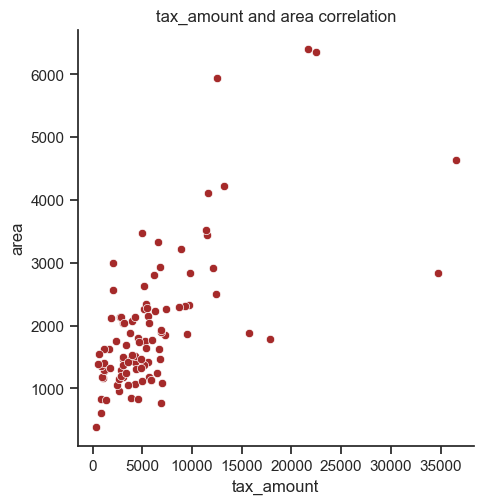

In [32]:
sns.relplot(data = train, x='tax_amount', y='area', color='brown').set(title='tax_amount and area correlation')
plt.show()

There is a right tail in this distribution, there is a increase of area as tax amount is increased.

**Null Hypothesis: There is a correlation between area and tax_amount.**  
**Alternative Hypothesis: The is no correlation between area and tax_amount.**

In [33]:
pearsonr(train.tax_amount, train.area)

Reject the null hypothesis

There is no significant linear correlation between tax_amount and area. 9.486825901190335e-14



(0.6586245555439847, 9.486825901190335e-14)

In [34]:
correlation_coefficient, p_value, conclusion = explore.evaluate_correlation(train.tax_amount, train.area, method="Pearson")
print(f'{conclusion}\n\nCorrelation Coefficient: {correlation_coefficient:.4f}\n\np-value: {p_value}')

Reject the null hypothesis.

There is a significant linear correlation between tax_amount and area. 9.486825901190335e-14

Correlation Coefficient: 0.6586

p-value: 9.486825901190335e-14


- the correlation coefficient suggests a moderate positive linear correlation between the two variables. More features need to be tested to determine a more comprehensive analysis because these alone would not meet a suitable weight to help in model phase.

## Question 6

* Does tax_amount have a correlation with year built?

tax_amount is continous and year_built is continuous

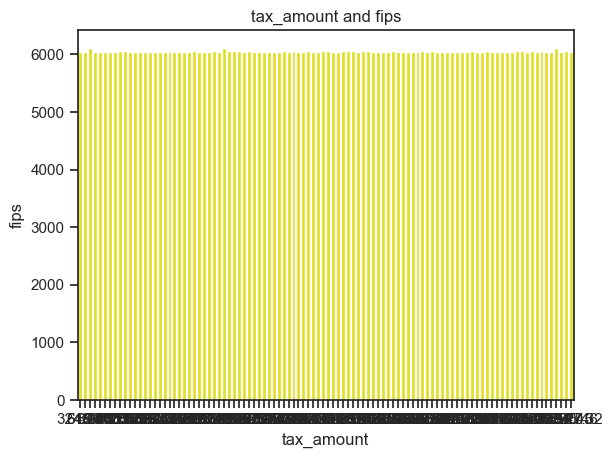

In [35]:
sns.barplot(data = train, x='tax_amount', y='fips', color='yellow').set(title='tax_amount and fips')
plt.show()

There is a uniform type of distribution in this visual. There seem's to not really be a correlation between tax_amount and year_built.

/opt/homebrew/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


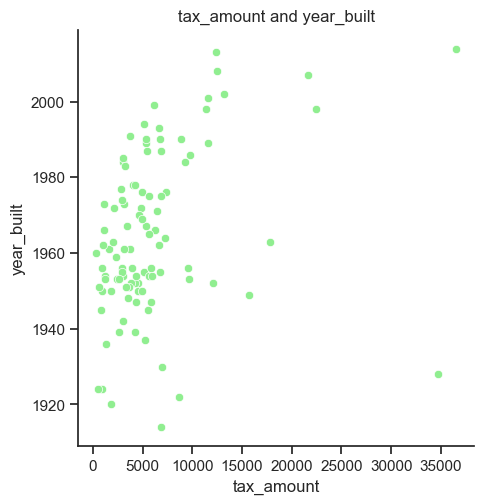

In [36]:
sns.relplot(data = train, x='tax_amount', y='year_built', color='lightgreen').set(title='tax_amount and year_built')
plt.show()

There is a uniform type of distribution in this visual. There seem's to not really be a correlation between tax_amount and year_built.

## 10. What independent variables are correlated with the dependent variable, home value?

## 11. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

## 12. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

## 13. Explore your dataset with any other visualizations you think will be helpful.

# Bonus Exercise

## 14. In a seperate notebook called explore_mall, use the functions you have developed in this exercise with the mall_customers dataset in the Codeup database server. You will need to write a sql query to acquire your data. Make spending_score your target variable.